
# Support Vector Machine

* only one vs rest
* -1 and +1

## Vectors


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 

%matplotlib inline

In [2]:
dataset = np.array([
    [1,2,1],
    [8,9,-1],
    [1.5,2.2,1],
    [10,11,-1],
    [0.5,1.23,1],
    [8.5,9.5,-1],
    [0.83,4.33,1],
    [10.32,11,-1]
])
columns = ['f1','f2','target']

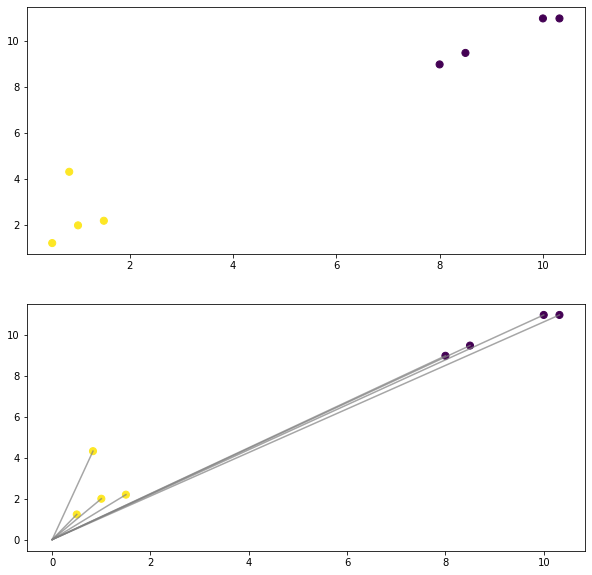

In [51]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(2,2,(1,2))
ax.scatter(dataset[:,[0]],dataset[:,[1]],c=dataset[:,[-1]],s=50)

ax = fig.add_subplot(2,2,(3,4))
ax.scatter(dataset[:,[0]],dataset[:,[1]],c=dataset[:,[-1]],s=50)

for i in dataset[:,[0,1]]:
    ax.plot([0,i[0]],[0,i[1]],c='grey',alpha=0.7)

plt.show()

### dot product

In [57]:
x = np.array([[1],[2]])
y = np.array([[2],[3]])

x.shape , y.shape

((2, 1), (2, 1))

In [58]:
x * y

array([[2],
       [6]])

### cross product

In [65]:
x , y.T , x @ y.T

(array([[1],
        [2]]),
 array([[2, 3]]),
 array([[2, 3],
        [4, 6]]))

### magnitude $||\vec{A}||$ 

In [72]:
x, np.sqrt(np.sum(x**2))

(array([[1],
        [2]]),
 2.23606797749979)